
## **TASK 1 - SPARK FOUNDATION**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### *CREATED BY : Sanurhanaan Shaikh*



### STEP 1 :
Importing all the libraries and data required for the regression task


In [4]:
# Simple Linear Regression
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
# Importing the datasets

data_source = "http://bit.ly/w-data"
data = pd.read_csv(data_source)

print("Data is sucessfully implemented")
data.head(24)

Data is sucessfully implemented


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### STEP 2 :
Checking for null values, data-type and errors in the given data repository

In [6]:
data.isna()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### STEP 3 :
Creating a plot to find relation between the data

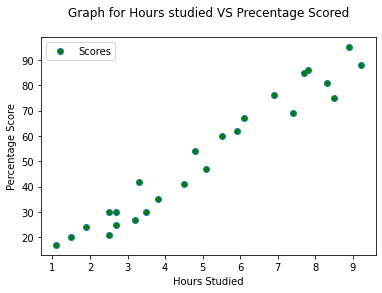

In [8]:
# Plotting the distribution of scores
data.plot(x = 'Hours', y = 'Scores', style = 'o', markerfacecolor = 'green')    
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Graph for Hours studied VS Precentage Scored\n')
plt.legend()
plt.show()

### STEP 4 :
Preaparing the data for regression.

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)and then to split this data into training and test sets.

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.4, random_state = 0)

### STEP 5 :
Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


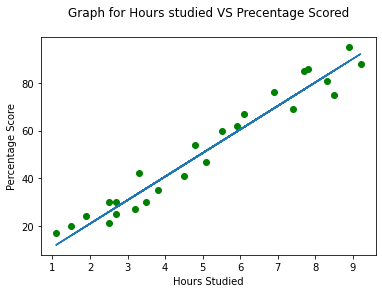

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'green')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Graph for Hours studied VS Precentage Scored\n')
plt.plot(X, line);
plt.show()

### STEP 6 :
Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [14]:
# Comparing Actual vs Predicted
y_diff = y_test - y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_diff })  
df

,Actual,Predicted,Difference
0,20,15.947762,4.052238
1,27,32.773947,-5.773947
2,69,74.344523,-5.344523
3,30,25.845518,4.154482
4,62,59.497889,2.502111
5,35,38.712601,-3.712601
6,24,19.906864,4.093136
7,86,78.303625,7.696375
8,76,69.395645,6.604355
9,17,11.988659,5.011341


### STEP 7 :
Evaluating the performance of algorithm.

Getting the required value and check for the errors (we have chosen the mean square error).

In [23]:
# You can also test with your own data
x = float(input('Enter number of Hours a student studies:'))
hours = [[x]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter number of Hours a student studies:9.25
No of Hours = [[9.25]]
Predicted Score = 92.65537184734602


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.894510863410609
